# **Hierarchical clustering**

It is a method of cluster analysis that seeks to build a hierarchy of clusters.
It does this by either merging smaller clusters into larger ones (agglomerative) or by splitting larger clusters into smaller ones (divisive).
The resulting hierarchy is often visualized using a dendrogram

**Key Concepts:**

**Agglomerative clustering:**
Starts with each data point as its own cluster and iteratively merges the closest clusters until all points are in a single cluster.

**Divisive clustering:**
Starts with all data points in one cluster and recursively splits it into smaller clusters until each point is in its own cluster.

**Dendrogram:**
A tree-like diagram that visualizes the hierarchical structure of the clusters, showing the relationships and distances between them.

**How it works:**
1. **Distance Calculation:**
The algorithm first calculates the distance or similarity between all pairs of data points.

2. **Merging/Splitting:**
Depending on the chosen approach (agglomerative or divisive), it either merges the closest clusters or splits the most dissimilar ones, updating the distance matrix accordingly.

3. **Iteration:**
This process continues until a stopping criterion is met (e.g., all points are in one cluster, or a desired number of clusters is reached)

In hierarchical clustering, there are several linkage methods (also called agglomeration methods) that determine how the distance between clusters is calculated during the clustering process.

| Method           | Description                        | Shape of Clusters    |
| ---------------- | ---------------------------------- | -------------------- |
| Single Linkage   | Minimum distance between points    | Chain-like           |
| Complete Linkage | Maximum distance between points    | Compact              |
| Average Linkage  | Average distance between all pairs | Balanced             |
| Centroid Linkage | Distance between cluster centroids | May cause inversions |
| Ward’s Method    | Minimizes within-cluster variance  | Spherical, compact   |
| Median Linkage   | Uses coordinate median             | Less common          |
| Weighted Linkage | Equal weight average of clusters   | Similar to average   |


# Application:
1. **Biology / Genetics**

Phylogenetic trees: Group species based on genetic similarity.

Gene expression analysis: Cluster genes with similar expression patterns.

2. **Customer / Market Segmentation**

Group customers based on buying behavior, demographics, or website activity.

Identify subgroups within broader segments for targeted marketing.

3. **Document / Text Clustering**

Group similar documents, news articles, or research papers.

Helps in topic modeling and organizing large text corpora.

4. **Image Segmentation**

Group pixels with similar colors or features to segment objects in an image.

5. **Anomaly / Outlier Detection**

Detect unusual data points that don’t fit into any cluster.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

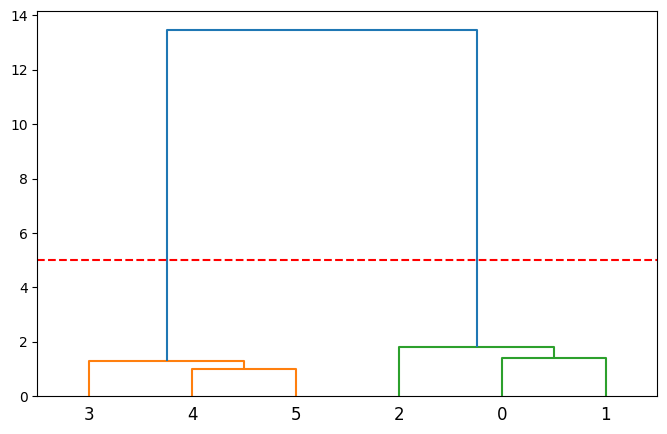

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Sample data
import numpy as np
X = np.array([[1,2],[2,3],[3,2],[8,7],[7,8],[8,8]])

# Create linkage matrix
Z = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(8, 5))
dendrogram(Z)

# Draw red dashed line at height = 5 (adjust based on your data)
plt.axhline(y=5, color='r', linestyle='--')
plt.show()

In [ ]:
from scipy.cluster.hierarchy import fcluster

# Define number of clusters
k = 2

# Assign cluster labels
labels = fcluster(Z, k, criterion='maxclust')
print(labels)


[2 2 2 1 1 1]


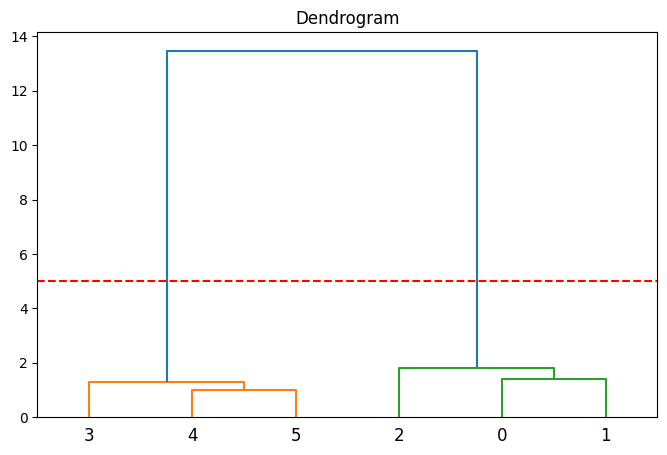

Cluster labels: [2 2 2 1 1 1]


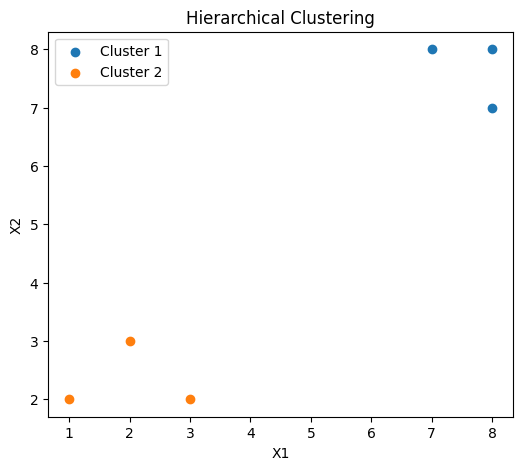

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Sample data
X = np.array([[1,2],[2,3],[3,2],[8,7],[7,8],[8,8]])

# Step 1: Create linkage matrix
Z = linkage(X, method='ward')

# Step 2: Plot dendrogram
plt.figure(figsize=(8,5))
dendrogram(Z)
plt.axhline(y=5, color='r', linestyle='--')  # horizontal line to choose clusters
plt.title("Dendrogram")
plt.show()

# Step 3: Form clusters based on number of clusters
k = 2
labels = fcluster(Z, k, criterion='maxclust')
print("Cluster labels:", labels)

# Step 4: Visualize clusters
plt.figure(figsize=(6,5))
for i in range(1, k+1):
    plt.scatter(X[labels==i, 0], X[labels==i, 1], label=f'Cluster {i}')
plt.title("Hierarchical Clustering")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()


In [ ]:
##-------------------------------------------Agglomerative------------------------------------------------------


Agglomerative Cluster labels: [0 0 0 1 1 1]


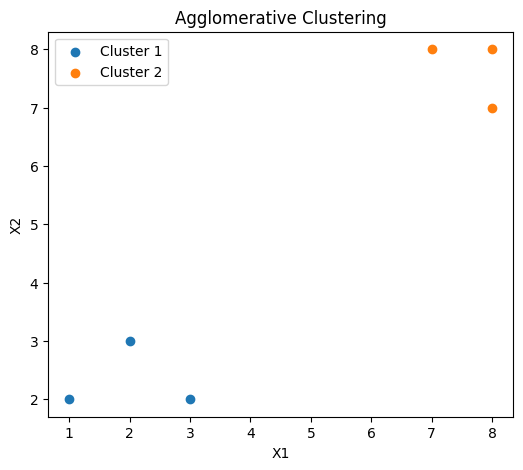

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Sample data
X = np.array([[1,2],[2,3],[3,2],[8,7],[7,8],[8,8]])

# Agglomerative clustering
agg_cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels = agg_cluster.fit_predict(X)
print("Agglomerative Cluster labels:", labels)

# Visualize clusters
plt.figure(figsize=(6,5))
for i in range(2):
    plt.scatter(X[labels==i, 0], X[labels==i, 1], label=f'Cluster {i+1}')
plt.title("Agglomerative Clustering")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()


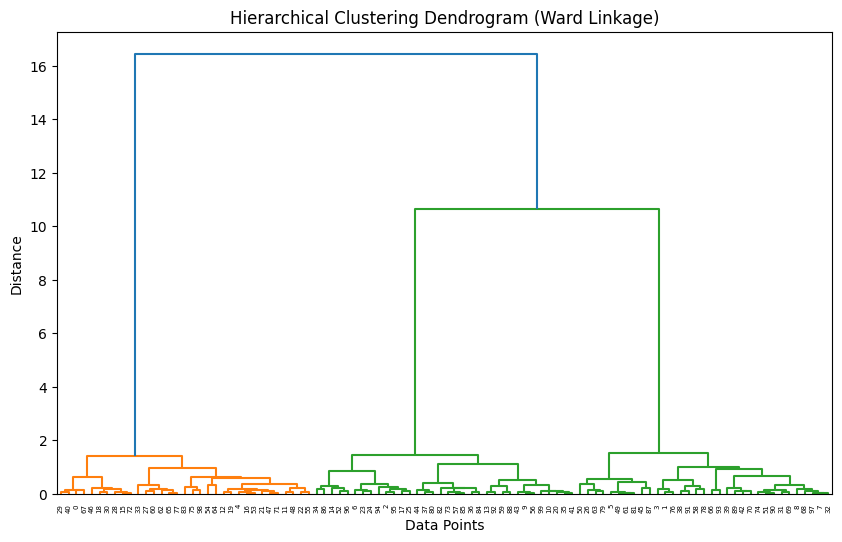

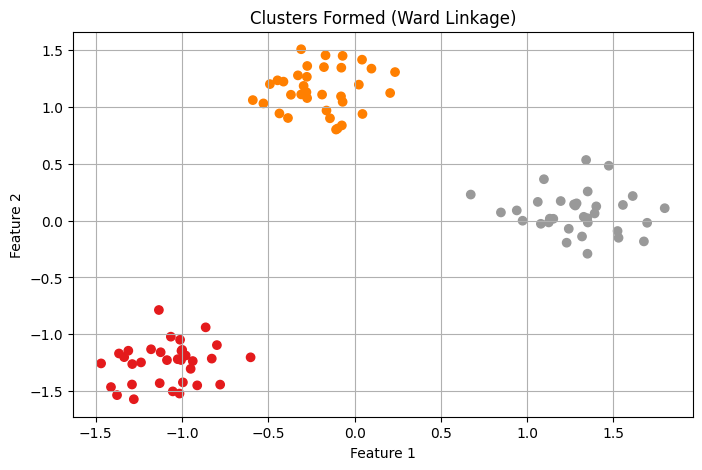

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

# 1. Generate sample data
X, y_true = make_blobs(n_samples=100, centers=3, cluster_std=1.2, random_state=42)

# 2. Scale the data (important for distance-based algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Create linkage matrix using different methods: 'ward', 'single', 'complete', 'average'
Z = linkage(X_scaled, method='ward')

# 4. Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# 5. Form clusters by cutting the dendrogram
from scipy.cluster.hierarchy import fcluster
k = 3  # number of clusters
clusters = fcluster(Z, k, criterion='maxclust')

# 6. Visualize the clustered data
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='Set1')
plt.title('Clusters Formed (Ward Linkage)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()
